In [1]:
from forcastlib.models.season import SeasonTrend
from forcastlib.datasets.seasonalrev import seasrev_dataset

2022-11-24 10:32:35.606160: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-24 10:32:35.692855: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
# get dataset
data = seasrev_dataset()

# train test split
test_size = 120
data_X = [ i for i in range(len(data))]
X_train = data_X[:-test_size]
Y_train = data[:-test_size]
X_test = data_X[-test_size:]
Y_test = data[-test_size:]

In [3]:
model = SeasonTrend(12)
model.fit(X_train, Y_train)

2022-11-24 10:32:41.309759: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
`scale_identity_multiplier` is deprecated; please combine it into `scale_diag` directly instead.


2022-11-24 10:32:50.330835: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x55c30269d1b0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-11-24 10:32:50.330865: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Host, Default Version
2022-11-24 10:32:50.465480: W tensorflow/compiler/tf2xla/kernels/random_ops.cc:102] Warning: Using tf.random.uniform with XLA compilation will ignore seeds; consider using tf.random.stateless_uniform instead if reproducible behavior is desired. fit_surrogate_posterior/StatefulPartitionedCall/monte_carlo_variational_loss/default_joint_bijectorJointDistributionNamedAutoBatched_CONSTRUCTED_AT_monte_carlo_variational_loss_build_factored_surrogate_posterior_1/sample_and_log_prob/JointDistributionNamedAutoBatched/sample_and_log_prob/sanitize_seed/seed
2022-11-24 10:32:50.477266: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer

In [4]:
mean, std = model.predict(X_test)

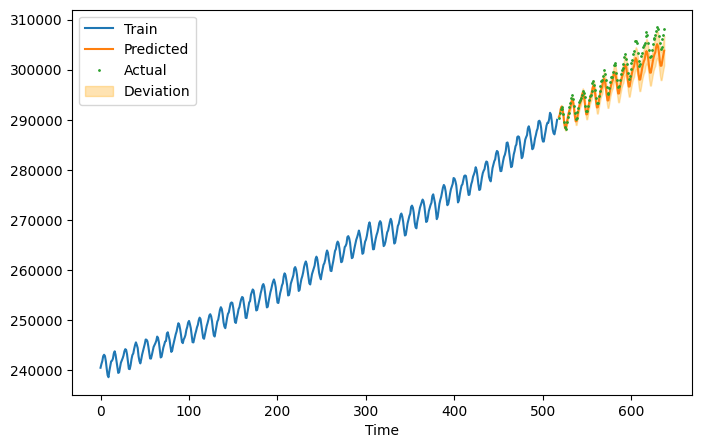

In [5]:
from forcastlib.graph.graph import plot_graph

plot_graph(Y_train, Y_test, mean, -std, std)